In [1]:
# 步骤总览

## 1. EDA
# 1.1 读取数据与基本结构查看
# 1.2 检查缺失值与重复值
# 1.3 目标变量（y）的分布分析：类别不平衡情况
# 1.4 特征（X）的统计特性分析（均值、方差等）
# 1.5 特征相关性分析
# 1.6 降维可视化（如 PCA 或 t-SNE）
# 1.7 小结与对建模的启示

## 2. Feature Selection
# 2.1 T-test method  (最终选择)
# 2.2 mean-value method
# 2.3 feature_importance_ method

## 3. Model Training
# 3.1 Logistic Regression
# 3.2 Random Forest
# 3.3 XGBoost

## 4. Distribution shift
# 4.1 Covariate Shift
# 4.2 Label Shift
# 4.3 Concept shift
# 4.4 Solution


In [2]:
## 1. EDA

In [3]:
# 1.1 读取数据与基本结构查看

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler, LabelBinarizer, label_binarize
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, log_loss, classification_report, confusion_matrix, ConfusionMatrixDisplay,make_scorer
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import ks_2samp, entropy
from imblearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [11]:
# Read data and basic structure view

In [29]:
X_train = pd.read_csv("data/X_train.csv")
y_train = pd.read_csv("data/y_train.csv")

# 查看数据维度
print("特征数据维度:", X_train.shape)   
print("标签数据维度:", y_train.shape)   

特征数据维度: (10000, 300)
标签数据维度: (10000, 1)


In [14]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.617940,-0.391980,0.13278,0.032551,0.55201,0.83393,-0.837550,-0.874060,0.43930,0.268260,...,-0.45454,0.36452,1.575300,-0.620320,-0.25371,-0.447750,-0.038273,-0.019938,-0.195500,0.428830
1,0.333860,-1.549100,1.67050,0.793560,0.80251,-0.07206,-0.068276,3.302400,0.52045,0.685720,...,-0.36913,1.74080,1.286600,-0.013396,-1.53930,0.833540,0.472610,0.513030,-0.743140,1.219900
2,0.040399,-0.608070,1.62080,-0.355970,0.12105,1.35250,0.373200,1.111700,0.35894,-0.344100,...,-1.40230,-0.24763,0.507050,0.708220,-0.60083,0.911040,0.009979,-0.475990,-0.094731,-0.008521
3,1.723600,0.195290,1.03880,-3.009100,-0.33222,0.91067,0.666690,0.717250,3.05850,1.489900,...,-1.21540,-0.25284,-1.307800,-0.445660,0.27918,0.264670,-0.149360,1.492900,-1.176700,-1.854500
4,-1.032300,1.900100,-1.46010,0.383710,-0.51039,0.74481,-0.914660,-0.865880,-0.34426,0.869650,...,1.32230,0.06020,-1.079000,-0.617050,1.18450,-0.210630,-0.105870,-0.412040,1.409700,0.133350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.821000,-0.016804,0.36978,-1.652500,1.32370,-0.67655,-1.238000,-0.764210,0.16283,-0.240030,...,-1.25470,-0.76602,1.453600,1.954500,0.47550,-1.824700,-0.227030,1.879700,-1.123800,1.309600
9996,-0.636390,-0.403470,0.81521,-0.665990,-2.16210,2.03190,0.278910,0.169180,0.52821,-0.217570,...,0.42273,-0.07438,-0.958710,-0.030666,-0.43114,0.075285,-0.892370,-0.677320,-1.330200,-0.809090
9997,0.773410,0.157330,-0.82969,-2.569100,1.33060,-0.45354,0.154800,0.010011,0.79613,0.606680,...,-1.15410,-1.75520,-1.645100,0.316050,-0.49966,0.997910,-1.389800,0.773250,0.049626,-0.500440
9998,-0.382970,1.011900,-2.12320,1.385600,0.30195,-0.45940,-0.050270,0.591280,1.49210,0.012371,...,0.24839,0.20263,0.010861,-0.775840,-0.98314,0.216800,1.323800,0.450360,1.586200,-0.289050


In [15]:
y_train

,label
0,10
1,5
2,5
3,5
4,5
...,...
9995,19
9996,5
9997,17
9998,24


In [16]:
 # 1.2 检查缺失值与重复值

In [17]:
# 检查特征和标签中的缺失值数量
missing_values_X = X_train.isnull().sum().sum()
missing_values_y = y_train.isnull().sum().sum()

print(f"特征数据缺失值数量：{missing_values_X}")
print(f"标签数据缺失值数量：{missing_values_y}")

# 检查特征数据是否存在重复行
duplicate_rows_X = X_train.duplicated().sum()
print(f"特征数据中的重复行数量：{duplicate_rows_X}")


特征数据缺失值数量：0
标签数据缺失值数量：0
特征数据中的重复行数量：0


In [18]:
# 结论1：数据无缺失值

In [19]:
# 1.3 目标变量（y）的分布分析：类别不平衡情况

In [20]:
# 统计label中每一个类别的个数
class_counts = y_train.value_counts()
class_counts

label
5        4479
10       1081
6         553
8         516
12        457
24        385
17        354
26        278
21        269
14        264
4         238
25        184
19        177
20        153
27        107
7         103
11         78
3          65
13         62
18         60
23         41
15         26
9          25
0          18
1           7
2           7
22          7
16          6
Name: count, dtype: int64

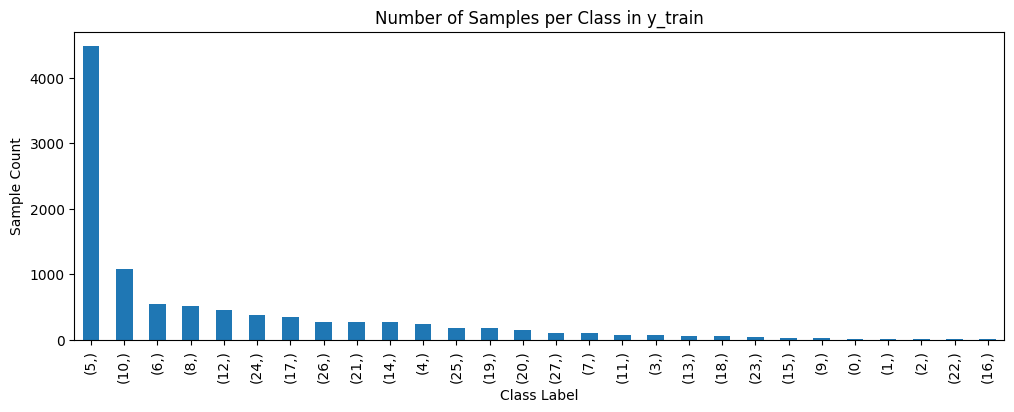

In [21]:
# 绘制柱状图进行表示
plt.figure(figsize=(12,4))
class_counts.plot(kind='bar')
plt.title("Number of Samples per Class in y_train")
plt.xlabel("Class Label")
plt.ylabel("Sample Count")
plt.show()

In [15]:
# 结论2：可以看出来类别分布是完全不均衡的，存在极端多类和极端少类

In [16]:
# 1.4 特征的统计特性分析

In [22]:
summary_stats = X_train.describe().T  # 每列为一个特征
print("每个特征的均值、标准差、最小值和最大值：")
print(summary_stats[['mean', 'std', 'min', 'max']])

每个特征的均值、标准差、最小值和最大值：
         mean       std      min      max
0   -0.021449  0.986789  -8.1638   4.5750
1   -0.000912  1.008141 -11.9820   4.2322
2    0.012368  1.009709  -3.5020   6.5868
3    0.045447  0.985909  -4.7040   3.8679
4    0.034961  0.988168  -7.0178   7.7052
..        ...       ...      ...      ...
295  0.021120  1.002988  -4.4358   4.6608
296  0.055394  1.000607  -3.7089  11.4290
297  0.013260  0.990364  -8.5983   3.9451
298 -0.045870  0.994845  -5.6691   4.2649
299 -0.096509  0.992540  -5.2105   4.1854

[300 rows x 4 columns]


In [18]:
# 均值分布直方图

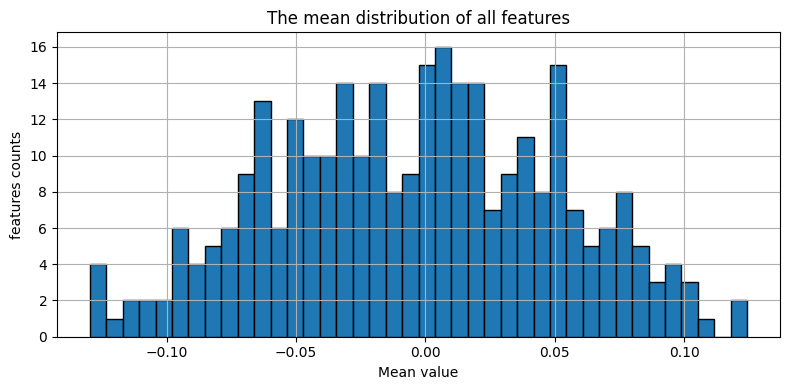

In [23]:
plt.figure(figsize=(8, 4))
plt.hist(summary_stats['mean'], bins=40, edgecolor='black')
plt.title("The mean distribution of all features")
plt.xlabel("Mean value")
plt.ylabel("features counts")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# 标准差分布直方图

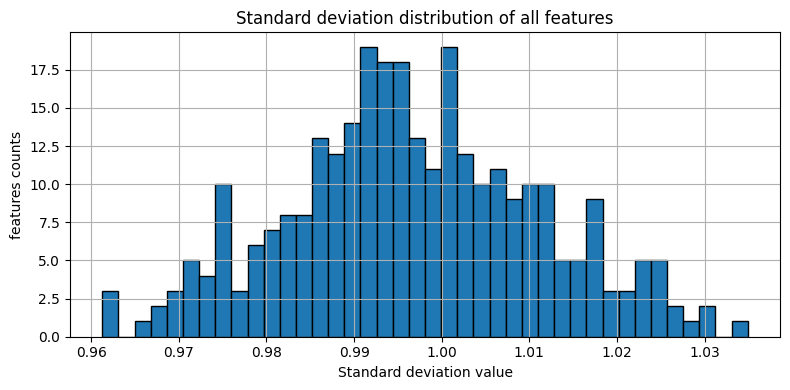

In [24]:
plt.figure(figsize=(8, 4))
plt.hist(summary_stats['std'], bins=40, edgecolor='black')
plt.title("Standard deviation distribution of all features")
plt.xlabel("Standard deviation value")
plt.ylabel("features counts")
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# 结论3：标准差分布集中，说明原数据已经经过了标准化

In [23]:
# 最小值分布直方图

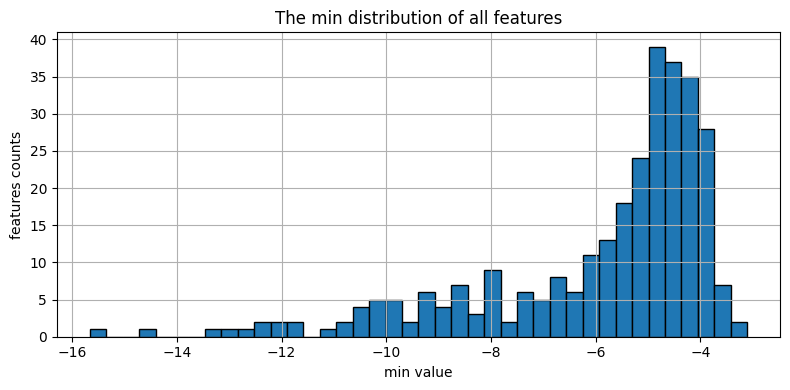

In [25]:
# 绘制直方图
plt.figure(figsize=(8, 4))
plt.hist(summary_stats['min'], bins=40, edgecolor='black')
plt.title("The min distribution of all features")
plt.xlabel("min value")
plt.ylabel("features counts")
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# 最大值分布直方图

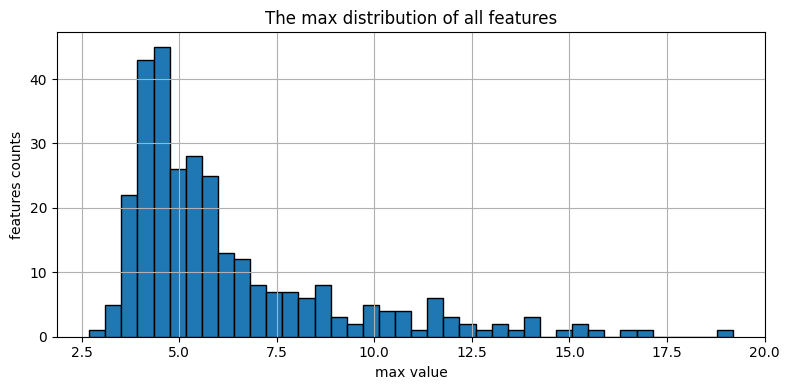

In [26]:
# 绘制直方图
plt.figure(figsize=(8, 4))
plt.hist(summary_stats['max'], bins=40, edgecolor='black')
plt.title("The max distribution of all features")
plt.xlabel("max value")
plt.ylabel("features counts")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# 对标准差进行分析

In [27]:
# 方差为 0 的特征
zero_var_cols = summary_stats[summary_stats['std'] == 0].index.tolist()

# 方差低于阈值0.01的值的数量
low_var_cols = summary_stats[summary_stats['std'] < 0.01].index.tolist()

print(f"方差为 0 的特征数量：{len(zero_var_cols)}")
print(f"方差低于 0.01 的特征数量：{len(low_var_cols)}")


方差为 0 的特征数量：0
方差低于 0.01 的特征数量：0


In [29]:
# 分析离群点

In [28]:
# IQR检测法检测离群点
outlier_counts = []

# 遍历每个特征列
for col in X_train.columns:
    q1 = X_train[col].quantile(0.25)
    q3 = X_train[col].quantile(0.75)
    iqr = q3 - q1

    # 定义异常值区间
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 计算该列中离群值的数量
    outliers = ((X_train[col] < lower_bound) | (X_train[col] > upper_bound)).sum()
    outlier_counts.append((col, outliers))

# 按离群值数量排序
outlier_counts_sorted = sorted(outlier_counts, key=lambda x: x[1], reverse=True)

# 显示离群值最多的前 10 个特征
print("离群值数量最多的前 10 个特征：")
for col, count in outlier_counts_sorted[:10]:
    print(f"特征 {col}: 离群值数量 = {count}")


离群值数量最多的前 10 个特征：
特征 259: 离群值数量 = 271
特征 59: 离群值数量 = 252
特征 119: 离群值数量 = 252
特征 84: 离群值数量 = 246
特征 33: 离群值数量 = 243
特征 242: 离群值数量 = 243
特征 8: 离群值数量 = 241
特征 188: 离群值数量 = 239
特征 180: 离群值数量 = 237
特征 165: 离群值数量 = 236


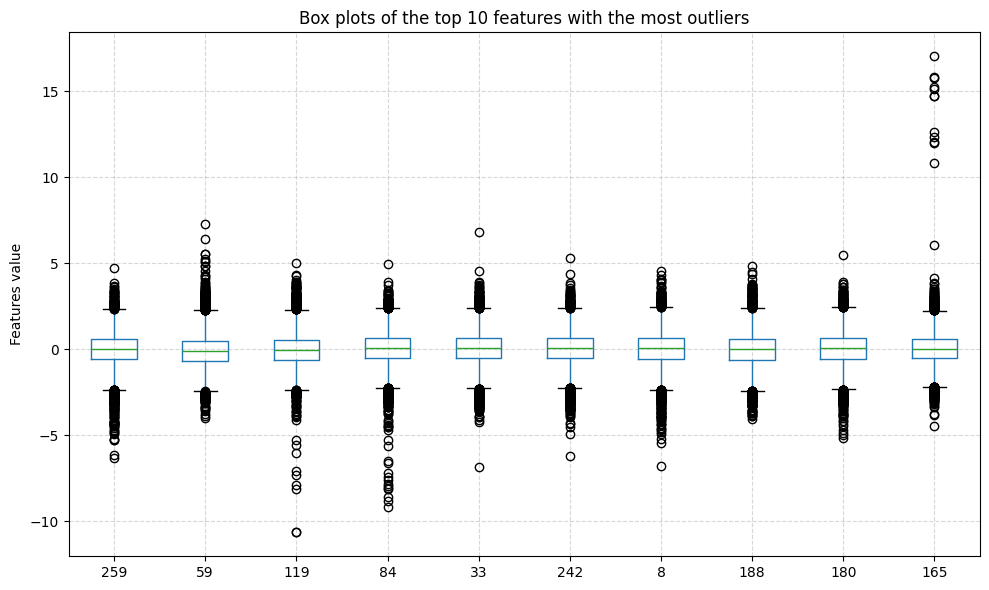

In [29]:
top_outlier_features = [col for col, _ in outlier_counts_sorted[:10]]

plt.figure(figsize=(10, 6))
X_train[top_outlier_features].boxplot()
plt.title("Box plots of the top 10 features with the most outliers")
plt.ylabel("Features value")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [32]:
# 结论4：正常情况下，IQR方法下的离群值总数占总样本数量的1%-5%，但该数据多个特征的离群点数目出现了200+个。
# 这代表这些特征的分布是非对称的、长尾的、偏态的

In [33]:
# 小结1：该数据可能不适合用于敏感模型，如Logistics Regression, SVM, KNN, Neural Network
# 原因： 
# Logistics Regression: 某一维特征突然变得极大（比如 999），那这个维度的权重w就会被迫减小，以“抵消”这个巨大值。
# SVM / KNN : 距离中心很远的点变成“伪最近邻”,SVM 边界被极端点推得很远，导致分类性能下降
# Neural Network: 输入某一维有异常大值，激活函数输入过大 → 梯度爆炸或消失，导致模型训练不稳定。

In [34]:
# 正态性分析

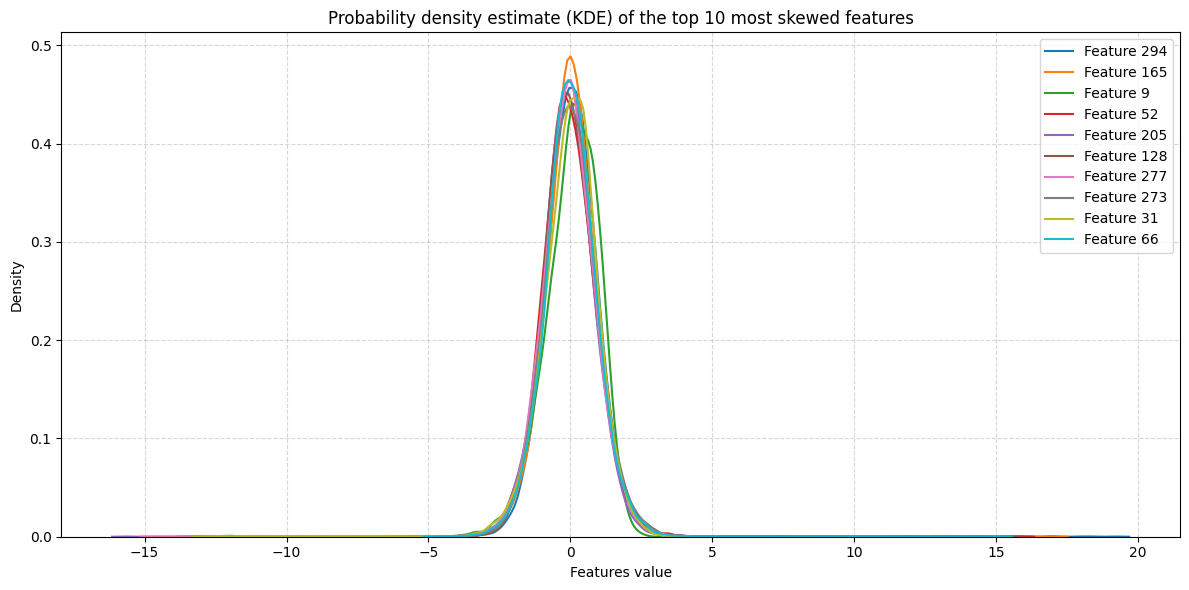

In [30]:
# 计算每个特征的偏度（skewness）并取绝对值排序
skews = X_train.skew().abs().sort_values(ascending=False)

# 获取偏态最大的前10个特征列索引
top_skew_features = skews.head(10).index.tolist()

# 绘制 KDE 图（放在一张图里）
plt.figure(figsize=(12, 6))
for col in top_skew_features:
    sns.kdeplot(X_train[col], label=f"Feature {col}", linewidth=1.5)

plt.title("Probability density estimate (KDE) of the top 10 most skewed features")
plt.xlabel("Features value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [36]:
# 结论5.1: 这些特征分布具有偏态（skewness），而非对称的高斯分布。
# 数据集中在左边，小数值多，大数值少但极端。所以是右偏（正偏）
# 有些特征的密度曲线在尾部有较宽的拖尾，说明和我们之前 IQR 检测到的“200+ 离群值”是一致的

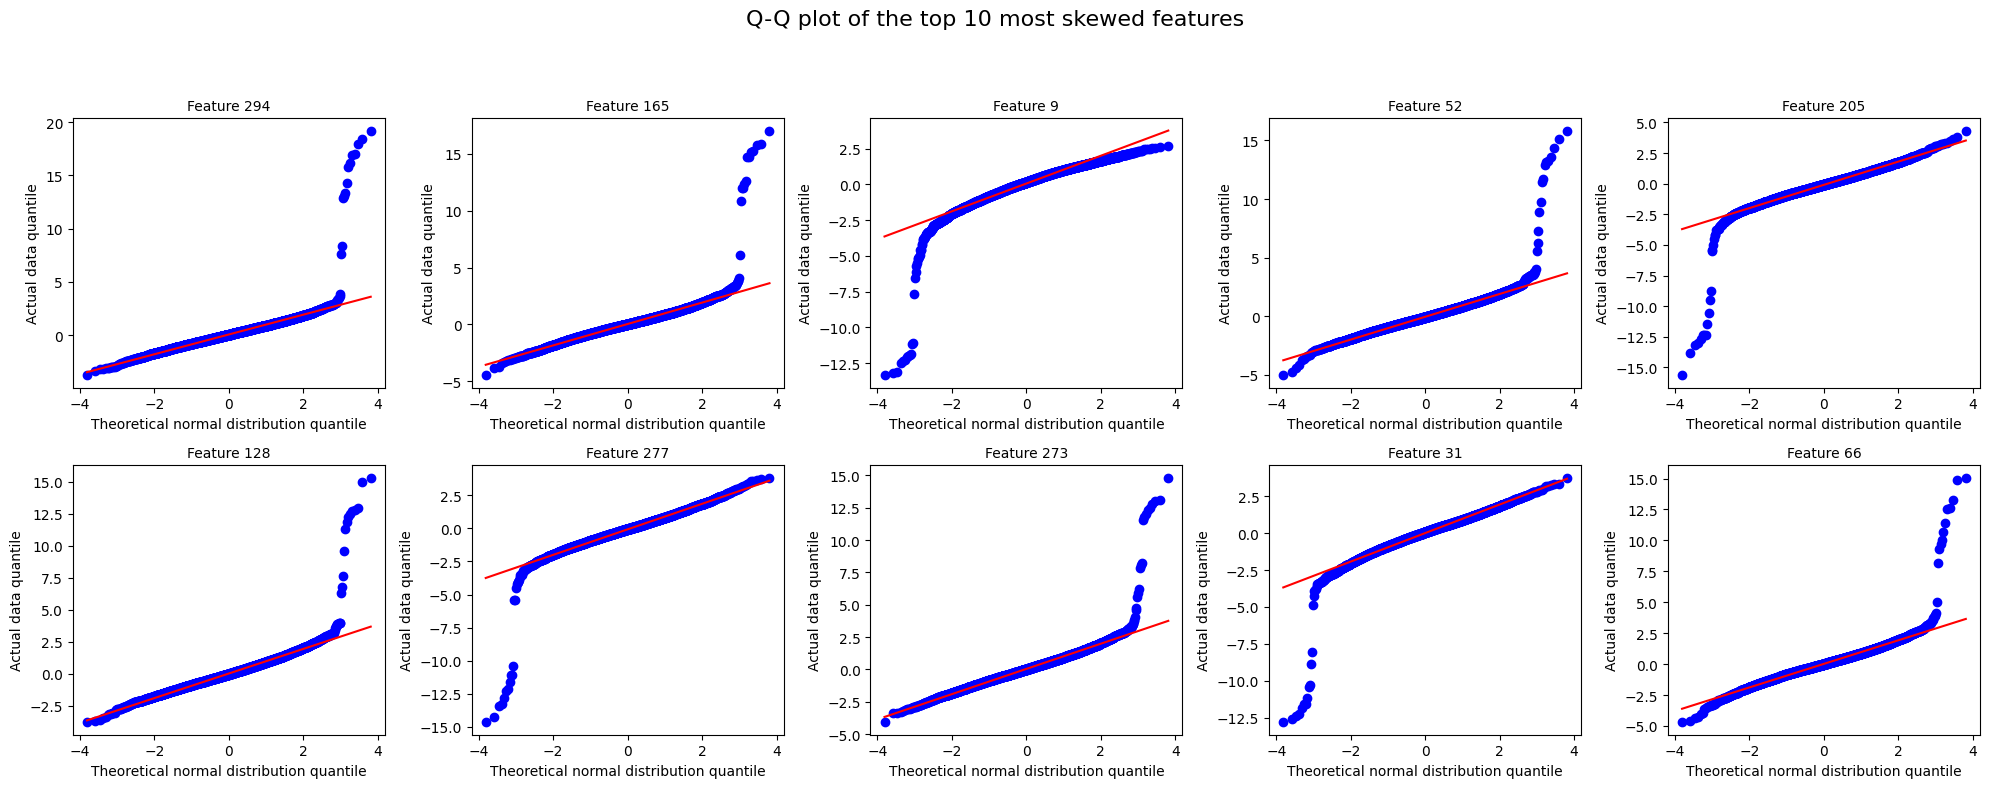

In [31]:
plt.figure(figsize=(20, 8))
for i, col in enumerate(top_skew_features):
    plt.subplot(2, 5, i + 1)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f"Feature {col}", fontsize=10)
    plt.xlabel("Theoretical normal distribution quantile")
    plt.ylabel("Actual data quantile")

plt.suptitle("Q-Q plot of the top 10 most skewed features", fontsize=16)
plt.tight_layout(rect=(0, 0, 1, 0.93))  
plt.show()

In [38]:
# 结论5.2: 尾部向上偏离对角线，是右偏(正偏)

In [39]:
# 5. 特征间的相关性分析

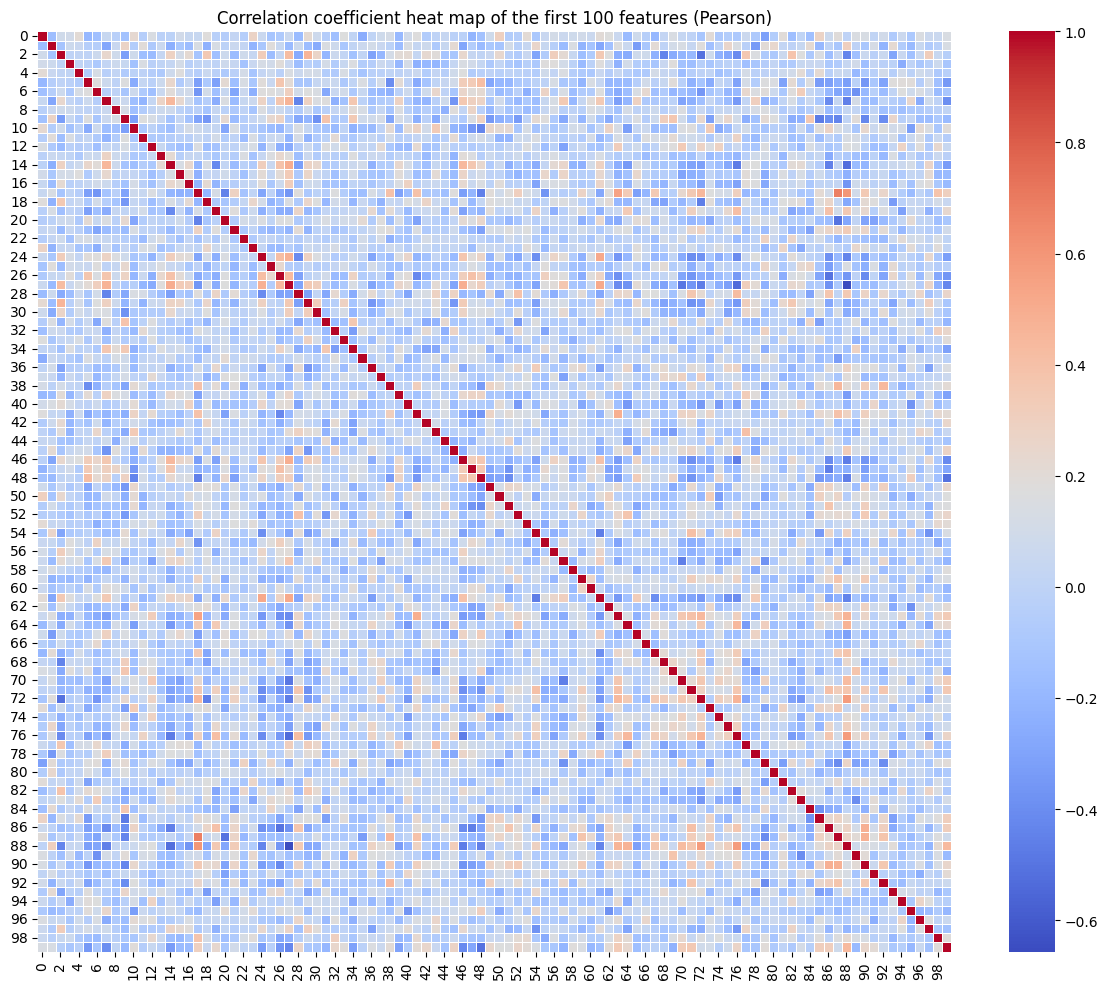

In [32]:
# 计算皮尔逊相关系数矩阵（特征与特征之间）
corr_matrix = X_train.corr()

# 可视化前30个特征的热力图
subset = X_train.iloc[:, :100]
corr_subset = subset.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_subset, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation coefficient heat map of the first 100 features (Pearson)")
plt.tight_layout()
plt.show()

In [33]:
#找出高相关的特征对
threshold = 0.9
s_corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(s_corr_matrix.shape), k=1).astype(bool))

# 找出高于阈值的特征对
high_corr_pairs = [(col, row, s_corr_matrix.loc[row, col])
                   for col in upper.columns
                   for row in upper.index
                   if pd.notnull(upper.loc[row, col]) and upper.loc[row, col] > threshold]

# 显示结果
if len(high_corr_pairs)>0:
    print("高于 0.9 的特征对（可能冗余）:")
    for a, b, c in high_corr_pairs:
        print(f"{a} ↔ {b} → 相关系数: {c:.3f}")
else:
    print("没有强相关的特征对")


没有强相关的特征对


In [42]:
# 结论6:特征之间较为独立，彼此不会线性重复 
# 多重共线性风险较低，线性模型（如 Logistic Regression）更稳定
# 无需手动剔除特征，可以保留全部特征继续建模

In [43]:
#6. PCA（主成分分析）降维与可视化 PCA (Principal Component Analysis) Dimensionality Reduction and Visualization

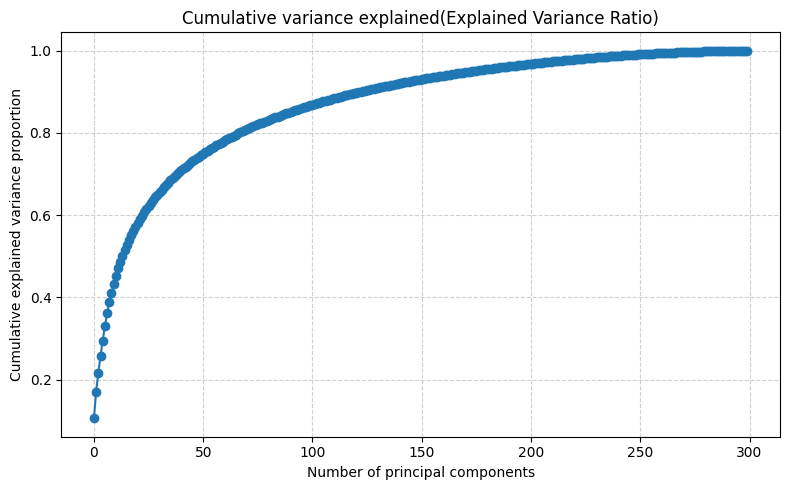

In [34]:
# 拟合 PCA 模型，保留全部 300 个主成分
pca = PCA(n_components=300)
pca.fit(X_train)

# 查看每个主成分解释的方差占比
explained_variance_ratio = pca.explained_variance_ratio_

# 累积贡献率曲线图
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.title("Cumulative variance explained(Explained Variance Ratio)")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance proportion")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [45]:
# 结论7: 前两个主成分仅解释 17.07%，说明特征信息非常“高维且均匀”，维度确实对整体意思表达存在重要作用

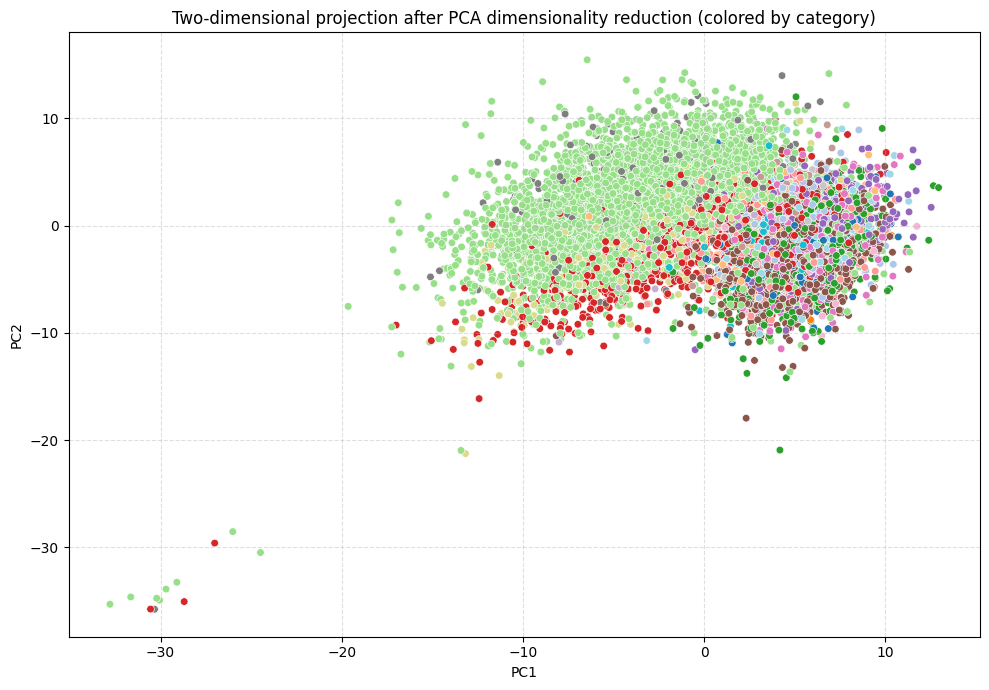

In [35]:
# 用 PCA 将数据降到二维
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train)

# 合并标签
X_pca_df = pd.DataFrame(X_pca_2d, columns=["PC1", "PC2"])
X_pca_df["label"] = y_train["label"]

# 可视化（使用 Seaborn）
plt.figure(figsize=(10, 7))
sns.scatterplot(data=X_pca_df, x="PC1", y="PC2", hue="label", palette="tab20", legend=False, s=30)
plt.title("Two-dimensional projection after PCA dimensionality reduction (colored by category)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [47]:
# ******************************   EDA finished   ******************************

In [48]:
## 2. Feature Selection

In [49]:
# 2.1 IOR method

In [33]:
X_test_1 = pd.read_csv("data/X_test_1.csv")
X_test_2 = pd.read_csv("data/X_test_2.csv")
y_test_2_reduced = pd.read_csv("data/y_test_2_reduced.csv")

In [31]:
X_test_2

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.031615,-0.758770,0.086539,-1.37000,-1.100000,0.084425,-0.82122,0.17931,0.214690,-0.443680,...,-0.14229,0.24575,0.893990,-0.082594,-0.429260,0.48601,-0.730080,0.405700,0.537740,0.891430
1,1.423100,-0.287910,-0.235390,0.15389,-0.327750,-2.248200,-1.84450,-0.03865,-0.910200,0.401300,...,-1.76590,0.21434,0.954160,-0.217540,-1.109200,-0.56965,-0.501660,0.123990,0.465660,0.499470
2,0.773970,-0.861780,0.977840,-0.88173,-0.007886,0.379990,0.15835,0.45024,0.395570,-0.089195,...,-0.75917,-0.17741,0.768400,0.883480,-0.256360,0.50909,-0.100570,1.286200,-1.374100,0.036951
3,-0.043148,-0.954310,0.436990,-0.91253,-0.292690,-0.976660,-0.24258,0.84514,1.552100,-0.275060,...,-0.05140,-1.05560,-1.579200,0.025965,-0.264420,0.39824,-0.602020,0.274420,-0.732140,-0.193390
4,0.357880,0.770610,0.210070,0.64266,-1.430400,1.414500,0.63321,1.61490,-0.703910,-0.030219,...,0.69786,-0.22054,-0.477740,0.419900,-0.351500,1.40320,0.717450,1.073100,-1.891300,-1.220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.116990,-2.750800,-1.504200,-0.43444,-2.000000,0.274390,0.36430,0.23207,0.182800,-1.385200,...,-0.22104,1.95300,1.177100,-1.400300,-2.100500,0.14877,1.606300,0.290890,1.647500,0.168900
2016,-0.336450,0.940870,0.030647,0.70629,-0.390210,-0.267180,0.16859,0.15003,-0.975240,-0.239700,...,0.55143,1.32870,0.251350,-1.476200,-0.241430,0.74651,0.307510,0.412300,0.906580,0.021997
2017,-0.491710,0.080699,-0.297230,0.65266,0.212730,-0.088889,-0.55004,-0.16700,-0.016033,0.067133,...,-0.58250,0.98694,0.897630,-0.279120,0.049465,-0.80232,0.004587,1.338400,-0.764640,1.455700
2018,-0.783190,-0.029347,0.637710,-1.19280,-2.280400,0.455550,-1.05580,0.32347,0.377200,-1.086300,...,0.88782,1.07380,1.670100,-0.270360,-0.480110,0.29074,1.051700,-1.408500,-0.023404,2.539800


In [37]:
y_test_2_reduced

,label
0,12
1,25
2,9
3,27
4,14
...,...
197,12
198,8
199,27
200,18


In [34]:
def winsorize_iqr(df, lower=1.5, upper=1.5):
    """
    Apply IQR-based winsorization to cap outliers in each feature column.

    This method clips each feature's values to lie within the range:
        [Q1 - lower * IQR, Q3 + upper * IQR],
    where Q1 and Q3 are the 25th and 75th percentiles, respectively, and
    IQR = Q3 - Q1.

    Parameters:
    -----------
    df : pd.DataFrame
        Input dataframe with numeric feature columns.
    lower : float, default=1.5
        Lower bound multiplier for the IQR range (used to define minimum threshold).
    upper : float, default=1.5
        Upper bound multiplier for the IQR range (used to define maximum threshold).

    Returns:
    --------
    pd.DataFrame
        A new DataFrame with outlier values capped using IQR method.
    """
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Input must be a pandas DataFrame")

    df_capped = df.copy()
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - lower * IQR
        upper_bound = Q3 + upper * IQR

        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df_capped
# === 2. 定义 iOR 打分函数 ===
def compute_ior(X, y):
    """
    Improved Odds Ratio (iOR) Feature Scoring Function.
    For each feature, computes the class-wise standardized mean difference (SMD),
    which is inspired by the Fisher Score and Cohen's d effect size.

    Parameters:
    -----------
    X : pd.DataFrame of shape (n_samples, n_features)
        Feature matrix (after preprocessing, e.g., winsorization, scaling)
    y : pd.Series of shape (n_samples,)
        Target labels (multi-class)

    Returns:
    --------
    np.ndarray of shape (n_features,)
        iOR score for each feature
    """
    y_arr = y.values.ravel()
    classes = np.unique(y_arr)
    scores = []

    for j in range(X.shape[1]):
        feat = X.iloc[:, j]
        score = 0.0
        for c in classes:
            pos = feat[y_arr == c]
            neg = feat[y_arr != c]

            μ1 = pos.mean() if len(pos) > 0 else 0
            μ0 = neg.mean() if len(neg) > 0 else 0
            σ1 = pos.std()
            σ0 = neg.std()

            # 防止标准差为0
            if σ1 == 0: σ1 = 1
            if σ0 == 0: σ0 = 1

            score += abs((μ1 - μ0) / (σ1 + σ0))
        scores.append(score)

    return np.array(scores)

Evaluating top-K: 100%|██████████| 300/300 [13:10<00:00,  2.64s/it]


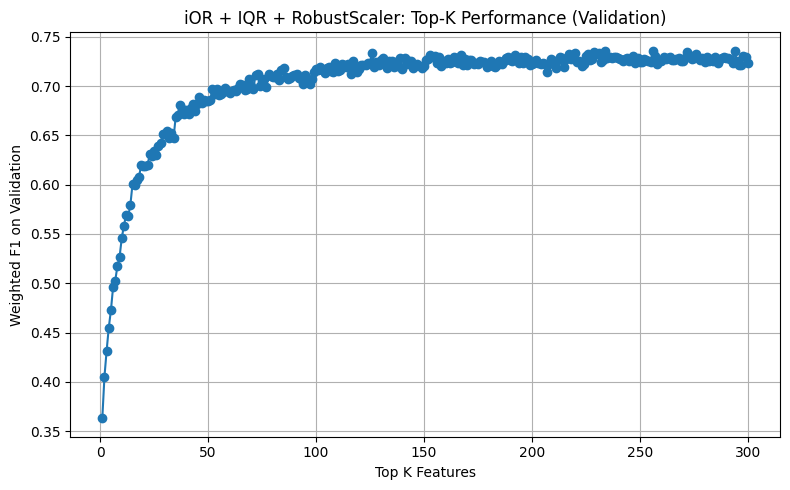


The best k = 234, and its Weighted F1-score on val dataset is 0.7358


In [113]:
# === 0. 划分子训练集 & 验证集（从原始训练集中抽出 20% 作为验证集） ===
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# === 3. 对子训练集 & 验证集同时做 IQR + RobustScaler ===
X_tr_capped = winsorize_iqr(X_train_sub)
X_val_capped = winsorize_iqr(X_val)

scaler = RobustScaler()
X_tr_scaled  = pd.DataFrame(scaler.fit_transform(X_tr_capped),
                            columns=X_tr_capped.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_capped),
                            columns=X_val_capped.columns)

# === 4. iOR 排序 + Top‑K 特征选择 & 验证集评估 ===
ior_scores   = compute_ior(X_tr_scaled, y_train_sub)
feature_rank = np.argsort(ior_scores)[::-1]

k_list  = list(range(1,301))
results = []

for k in tqdm(k_list, desc="Evaluating top-K"):
    cols_k   = X_tr_scaled.columns[feature_rank[:k]]
    Xk_tr    = X_tr_scaled[cols_k]
    Xk_val   = X_val_scaled[cols_k]

    model = XGBClassifier(
        objective='multi:softprob',
        num_class=28,
        eval_metric='mlogloss',
        n_estimators=100,
        random_state=42,
        tree_method='hist',
        device='cuda'
    )
    model.fit(Xk_tr, y_train_sub.values.ravel())
    y_pred = model.predict(Xk_val)

    f1 = f1_score(y_val, y_pred, average='weighted')
    results.append((k, f1))

# === 5. 可视化 Top‑K vs F1 曲线 ===
ks, f1s = zip(*results)
plt.figure(figsize=(8,5))
plt.plot(ks, f1s, marker='o')
plt.xlabel("Top K Features")
plt.ylabel("Weighted F1 on Validation")
plt.title("iOR + IQR + RobustScaler: Top-K Performance (Validation)")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 6. 输出最优 k & F1 ===
best_k, best_f1 = max(results, key=lambda x: x[1])
print(f"\nThe best k = {best_k}, and its Weighted F1-score on val dataset is {best_f1:.4f}")

In [35]:
# === 0. 划分训练集与验证集 ===
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# === 1. IQR 裁剪 ===
X_train_sub_capped = winsorize_iqr(X_train_sub)
X_val_capped = winsorize_iqr(X_val)

# === 2. 鲁棒缩放 ===
scaler = RobustScaler()
X_train_sub_scaled = pd.DataFrame(scaler.fit_transform(X_train_sub_capped), columns=X_train_sub.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_capped), columns=X_val.columns)

# === 3. 计算 iOR 分数（仅用子训练集）===
ior_scores = compute_ior(X_train_sub_scaled, y_train_sub)

# === 4. 构建 iOR 排名表 ===
ior_df = pd.DataFrame({
    'Feature': X_train_sub_scaled.columns,
    'iOR_score': ior_scores
}).sort_values(by='iOR_score', ascending=False).reset_index(drop=True)

# === 5. 设置最佳特征数量（使用前面验证得到的 k）===
k = 234
top_features_df = ior_df.head(k)
selected_columns = top_features_df['Feature'].tolist()

# === 6. 筛选特征（子训练集 & 验证集）===
X_train_selected = X_train_sub_scaled[selected_columns]
X_val_selected = X_val_scaled[selected_columns]

# === 7. 打印 Top‑K 特征 ===
print(f"Top {k} Features by improved Odds Ratio (iOR) from validation set:")
print(top_features_df)

Top 234 Features by improved Odds Ratio (iOR) from validation set:
    Feature  iOR_score
0       270  12.343952
1        90  12.236122
2       111  11.496960
3        17  11.482362
4       218  11.319202
..      ...        ...
229     278   4.949502
230      66   4.939633
231     193   4.931463
232     170   4.875109
233     212   4.854890

[234 rows x 2 columns]


In [ ]:
# 2.2 SelectKBest method

Evaluating SelectKBest(f_classif) on val: 100%|██████████| 300/300 [13:02<00:00,  2.61s/it]


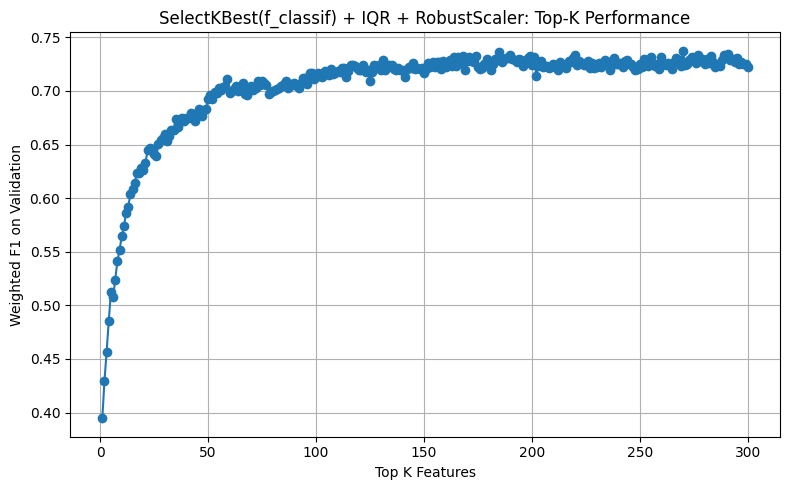


 The best k = 270, and its Weighted F1-score on validation set is 0.7375


In [45]:
# === Step 0: 划分子训练集与验证集 ===
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# === Step 1: 离群值裁剪（IQR）===
X_train_sub_capped = winsorize_iqr(X_train_sub)
X_val_capped = winsorize_iqr(X_val)

# === Step 2: 鲁棒标准化（RobustScaler）===
scaler = RobustScaler()
X_train_sub_scaled = pd.DataFrame(scaler.fit_transform(X_train_sub_capped),
                                  columns=X_train_sub.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_capped),
                            columns=X_val.columns)

# === Step 3: 特征选择 + 验证集评估 ===
k_list = list(range(1, 301))
results = []

for k in tqdm(k_list, desc="Evaluating SelectKBest(f_classif) on val"):
    selector = SelectKBest(score_func=f_classif, k=k)
    Xk_train = selector.fit_transform(X_train_sub_scaled, y_train_sub.values.ravel())
    Xk_val   = selector.transform(X_val_scaled)

    model = XGBClassifier(
        objective='multi:softprob',
        num_class=28,
        eval_metric='mlogloss',
        n_estimators=100,
        random_state=42,
        tree_method='hist',
        device='cuda'
    )
    model.fit(Xk_train, y_train_sub.values.ravel())
    y_pred = model.predict(Xk_val)

    f1 = f1_score(y_val, y_pred, average='weighted')
    results.append((k, f1))

# === Step 4: 可视化 Top‑K vs 验证集 F1 ===
ks, f1s = zip(*results)
plt.figure(figsize=(8, 5))
plt.plot(ks, f1s, marker='o')
plt.xlabel("Top K Features")
plt.ylabel("Weighted F1 on Validation")
plt.title("SelectKBest(f_classif) + IQR + RobustScaler: Top-K Performance")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Step 5: 输出最佳 k 和 F1 ===
best_k, best_f1 = max(results, key=lambda x: x[1])
print(f"\n The best k = {best_k}, and its Weighted F1-score on validation set is {best_f1:.4f}")

In [ ]:
# 根据上个步骤的结果获取最后保留的特征 (用于初步评估，仅具有参考意义)

In [36]:
# === 0. 划分训练子集与验证集 ===
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# === 1. 离群值裁剪（IQR）===
X_train_sub_capped = winsorize_iqr(X_train_sub)
X_val_capped = winsorize_iqr(X_val)

# === 2. 鲁棒缩放 ===
scaler = RobustScaler()
X_train_sub_scaled = pd.DataFrame(scaler.fit_transform(X_train_sub_capped), columns=X_train_sub.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_capped), columns=X_val.columns)

# === 3. 使用 SelectKBest(f_classif) 进行特征打分与选择 ===
k = 270  # 设置选择的特征数量
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_train_sub_scaled, y_train_sub.values.ravel())

# === 4. 获取每个特征的 F 分数和 p 值 ===
f_scores = selector.scores_
p_values = selector.pvalues_

# === 5. 构建特征打分表 ===
feature_scores_df = pd.DataFrame({
    'Feature': X_train_sub_scaled.columns,
    'F_score': f_scores,
    'p_value': p_values
}).sort_values(by='F_score', ascending=False).reset_index(drop=True)

# === 6. 选出 Top-K 特征列名 ===
top_features_df = feature_scores_df.head(k)
selected_columns = top_features_df['Feature'].tolist()

# === 7. 筛选子训练集和验证集特征列 ===
X_train_ftest = X_train_sub_scaled[selected_columns]
X_val_ftest = X_val_scaled[selected_columns]

# === 8. 打印结果 ===
print(f"Top {k} Features by F-test (ANOVA F-test) from validation set:")
print(top_features_df)

Top 270 Features by F-test (ANOVA F-test) from validation set:
    Feature     F_score       p_value
0        48  258.029213  0.000000e+00
1        17  231.333457  0.000000e+00
2       263  219.405359  0.000000e+00
3       270  218.617485  0.000000e+00
4        90  200.600021  0.000000e+00
..      ...         ...           ...
265     225   17.858959  3.939549e-82
266     289   17.798027  8.221130e-82
267      32   17.350174  1.833181e-79
268      66   17.212820  9.625267e-79
269     165   17.060832  6.030342e-78

[270 rows x 3 columns]


In [ ]:
# 2.3 Fisher-Score method

Evaluating Top-K (Fisher Score) on Validation: 100%|██████████| 300/300 [13:11<00:00,  2.64s/it]


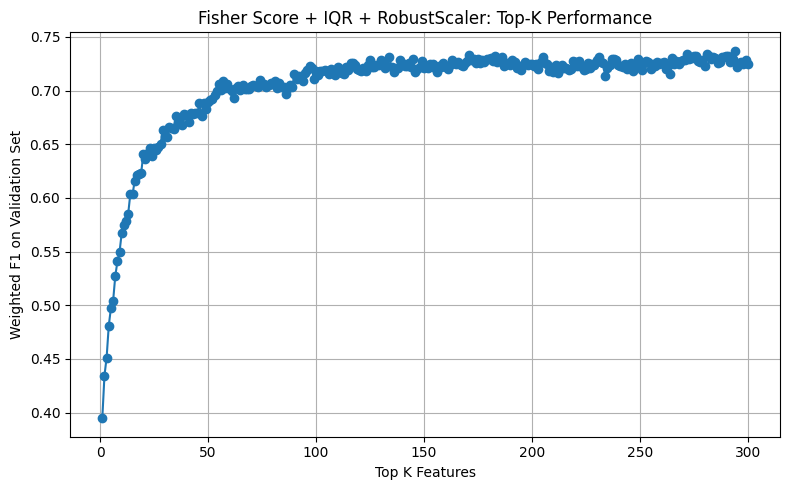


 The best k is 294, and its weighted F1-score on validation set is 0.7371


In [47]:
# === Step 0: 划分子训练集与验证集 ===
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# === Step 2: Fisher Score 实现 ===
def fisher_score(X, y):
    y = y.values.ravel()
    overall_mean = X.mean(axis=0)
    classes = np.unique(y)

    numerator = np.zeros(X.shape[1])
    denominator = np.zeros(X.shape[1])

    for cls in classes:
        idx = (y == cls)
        n_c = np.sum(idx)
        if n_c == 0:
            continue
        class_mean = X[idx].mean(axis=0)
        class_var = X[idx].var(axis=0) + 1e-8  # 避免除以0
        numerator += n_c * (class_mean - overall_mean) ** 2
        denominator += n_c * class_var

    scores = numerator / denominator
    return scores

# === Step 3: IQR + RobustScaler ===
X_train_sub_capped = winsorize_iqr(X_train_sub)
X_val_capped = winsorize_iqr(X_val)

scaler = RobustScaler()
X_train_sub_scaled = pd.DataFrame(scaler.fit_transform(X_train_sub_capped),
                                  columns=X_train_sub.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_capped),
                            columns=X_val.columns)

# === Step 4: Fisher Score 计算 + Top-K 特征评估 ===
k_list = list(range(1, 301))
results = []

fisher_scores = fisher_score(X_train_sub_scaled, y_train_sub)
feature_ranks = np.argsort(fisher_scores)[::-1]  # 降序排列

for k in tqdm(k_list, desc="Evaluating Top-K (Fisher Score) on Validation"):
    selected_indices = feature_ranks[:k]
    selected_cols = X_train_sub_scaled.columns[selected_indices]

    Xk_train = X_train_sub_scaled[selected_cols]
    Xk_val   = X_val_scaled[selected_cols]

    model = XGBClassifier(
        objective='multi:softprob',
        num_class=28,
        eval_metric='mlogloss',
        n_estimators=100,
        random_state=42,
        tree_method='hist',
        device='cuda'
    )
    model.fit(Xk_train, y_train_sub.values.ravel())
    y_pred = model.predict(Xk_val)

    f1 = f1_score(y_val, y_pred, average='weighted')
    results.append((k, f1))

# === Step 5: 可视化 Top-K vs 验证集 F1 ===
k_vals, f1_vals = zip(*results)
plt.figure(figsize=(8, 5))
plt.plot(k_vals, f1_vals, marker='o')
plt.xlabel("Top K Features")
plt.ylabel("Weighted F1 on Validation Set")
plt.title("Fisher Score + IQR + RobustScaler: Top-K Performance")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Step 6: 输出最优 K 和对应的验证集 F1 ===
best_k, best_f1 = max(results, key=lambda x: x[1])
print(f"\n The best k is {best_k}, and its weighted F1-score on validation set is {best_f1:.4f}")


In [37]:
# === Step 0: 划分训练子集与验证集 ===
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# === Step 1: 离群值裁剪（IQR）===
def winsorize_iqr(df, lower=1.5, upper=1.5):
    df_capped = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - lower * IQR
        upper_bound = Q3 + upper * IQR
        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

X_train_sub_capped = winsorize_iqr(X_train_sub)
X_val_capped = winsorize_iqr(X_val)

# === Step 2: 鲁棒标准化 ===
scaler = RobustScaler()
X_train_sub_scaled = pd.DataFrame(scaler.fit_transform(X_train_sub_capped), columns=X_train_sub.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_capped), columns=X_val.columns)

# === Step 3: 自定义 Fisher Score 函数 ===
def fisher_score_manual(X, y):
    X = np.asarray(X)
    y = np.asarray(y)
    classes = np.unique(y)
    n_features = X.shape[1]
    scores = np.zeros(n_features)

    overall_mean = X.mean(axis=0)

    for j in range(n_features):
        num = 0.0
        denom = 0.0
        for c in classes:
            X_c = X[y == c, j]
            n_c = X_c.shape[0]
            mu_c = np.mean(X_c)
            var_c = np.var(X_c)
            num += n_c * (mu_c - overall_mean[j]) ** 2
            denom += n_c * var_c
        scores[j] = num / (denom + 1e-8)  # 防止除以 0
    return scores

# === Step 4: 设置选择的特征数量 ===
k = 294

# === Step 5: 计算 Fisher Score 并选择前 k 个特征（仅用训练子集）===
fisher_scores = fisher_score_manual(X_train_sub_scaled.values, y_train_sub.values.ravel())
feature_ranks = np.argsort(fisher_scores)[::-1]
top_indices = feature_ranks[:k]
top_columns = X_train_sub_scaled.columns[top_indices]

# === Step 6: 筛选子训练集 & 验证集中的特征列 ===
X_train_fisher = X_train_sub_scaled[top_columns]
X_val_fisher = X_val_scaled[top_columns]

# === Step 7: 构造评分表输出 ===
feature_scores_df = pd.DataFrame({
    'Feature': X_train_sub_scaled.columns,
    'Fisher_Score': fisher_scores
})
top_features_df = feature_scores_df.sort_values(by='Fisher_Score', ascending=False).head(k).reset_index(drop=True)

# === Step 8: 打印结果 ===
print(f"\nTop {k} Features by Fisher Score (from validation set split):")
print(top_features_df)


Top 294 Features by Fisher Score (from validation set split):
    Feature  Fisher_Score
0        48      0.873907
1        17      0.783493
2       263      0.743094
3       270      0.740426
4        90      0.679403
..      ...           ...
289     180      0.039109
290      42      0.038724
291     137      0.038535
292     288      0.037672
293     191      0.032149

[294 rows x 2 columns]


In [57]:
# ******************************   Feature selection finished   ******************************

In [ ]:
# 3. Model training

In [ ]:
# 3.1 XGB model

In [38]:
# === Weighted Log Loss 实现 ===
def weighted_log_loss(y_true, y_pred_proba):
    class_counts = np.sum(y_true, axis=0)
    class_weights = 1.0 / (class_counts + 1e-8)
    class_weights /= np.sum(class_weights)

    sample_weights = np.sum(y_true * class_weights, axis=1)
    sample_losses = -np.sum(y_true * np.log(y_pred_proba + 1e-8), axis=1)
    weighted_loss = np.mean(sample_weights * sample_losses)
    return weighted_loss

# === 特征集合（训练子集 & 验证集，统一评估）===
feature_sets = {
    "IOR": (X_train_selected, X_val_selected),
    "F-test": (X_train_ftest, X_val_ftest),
    "Fisher Score": (X_train_fisher, X_val_fisher)
}

results_xgb = []

for name, (X_subtrain, X_val) in feature_sets.items():
    print(f"\n[XGBoost] Feature Selection: {name}")

    # = 1. 可选 Winsorize（如之前已处理，此步可跳过） =
    X_subtrain = winsorize_iqr(X_subtrain)
    X_val = winsorize_iqr(X_val)

    # = 2. Robust Scaling =
    scaler = RobustScaler()
    X_subtrain_scaled = scaler.fit_transform(X_subtrain)
    X_val_scaled = scaler.transform(X_val)

    # = 3. SMOTE 过采样（用于训练子集）=
    smote = SMOTE(random_state=42, k_neighbors=3)
    X_subtrain_res, y_subtrain_res = smote.fit_resample(X_subtrain_scaled, y_train_sub)

    # = 4. 训练 XGBoost 模型 =
    model = XGBClassifier(
        objective='multi:softprob',
        num_class=28,
        eval_metric='mlogloss',
        n_estimators=100,
        random_state=42,
        tree_method='hist',
        device='cuda'
    )
    model.fit(X_subtrain_res, y_subtrain_res)

    # = 5. 验证集预测 =
    y_val_pred = model.predict(X_val_scaled)
    y_val_proba = model.predict_proba(X_val_scaled)

    # = 6. One-hot 编码 y_val =
    lb = LabelBinarizer()
    lb.fit(range(28))
    y_val_onehot = lb.transform(y_val)
    if y_val_onehot.shape[1] == 1:  # 防止维度问题
        y_val_onehot = np.hstack([1 - y_val_onehot, y_val_onehot])

    # = 7. 汇总结果 =
    results_xgb.append({
        "Feature Selection": name,
        "F1_macro": round(f1_score(y_val, y_val_pred, average='macro', zero_division=0), 4),
        "F1_weighted": round(f1_score(y_val, y_val_pred, average='weighted', zero_division=0), 4),
        "Log_loss": round(log_loss(y_val, y_val_proba), 4),
        "Weighted_Log_Loss": round(weighted_log_loss(y_val_onehot, y_val_proba), 4)
    })

# === 最终评估结果表格输出 ===
df_xgb = pd.DataFrame(results_xgb)
print("\n=== XGBoost Evaluation Results on Validation Set ===")
print(df_xgb)


[XGBoost] Feature Selection: IOR

[XGBoost] Feature Selection: F-test

[XGBoost] Feature Selection: Fisher Score

=== XGBoost Evaluation Results on Validation Set ===
  Feature Selection  F1_macro  F1_weighted  Log_loss  Weighted_Log_Loss
0               IOR    0.4242       0.7383    1.0342             0.0082
1            F-test    0.4380       0.7432    1.0146             0.0082
2      Fisher Score    0.4396       0.7352    1.0242             0.0080


In [ ]:
# 综合后选择了F-test

In [ ]:
# XGB调参

In [119]:
# === 1. 数据准备 ===
# 假设 X_train_ftest、y_train_sub 已经定义并且为 pandas.DataFrame/Series
X_train_fs = X_train_ftest.copy()  # F-test 选择后的特征子集

# 离群值裁剪
X_train_clean = winsorize_iqr(X_train_fs)

# 缩放
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train_clean)

# 划分子训练集和验证集（验证集用于最终评估）
X_subtrain, X_val, y_subtrain, y_val = train_test_split(
    X_scaled,
    y_train_sub,
    test_size=0.2,
    stratify=y_train_sub,
    random_state=42
)

# 对子训练集做 SMOTE 过采样
smote = SMOTE(random_state=42, k_neighbors=3)
X_subtrain_res, y_subtrain_res = smote.fit_resample(X_subtrain, y_subtrain.values.ravel())

# === 2. 定义基础模型和交叉验证方案 ===
base_model = XGBClassifier(
    objective='multi:softprob',
    num_class=28,
    eval_metric='mlogloss',
    tree_method='hist',
    device='cuda',
    random_state=42
)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === 3. 四个阶段的参数网格列表 ===
param_grids = [
    # 第一阶段：学习率 + 基学习器数
    {
        'n_estimators': [100, 300, 500, 700, 1000],
        'learning_rate': [0.01, 0.05, 0.1, 0.3]
    },
    # 第二阶段：树深度 + 最小叶子权重
    {
        'max_depth': [3, 6, 10],
        'min_child_weight': [1, 3, 5]
    },
    # 第三阶段：样本采样比例 + 特征采样比例 + gamma
    {
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.3, 0.5]
    },
    # 第四阶段：L1/L2 正则
    {
        'reg_alpha': [0, 0.5, 1],
        'reg_lambda': [1, 5, 10]
    }
]

# 用于累积各阶段的最优参数
best_params = {}

# === 4. 分阶段循环 GridSearchCV ===
for stage, grid_params in enumerate(param_grids, start=1):
    print(f"\n=== Stage {stage} Hyperparameter Tuning ===")
    # 将前面阶段的最优参数 set 给模型
    model = base_model.set_params(**best_params)
    # 构建并运行 GridSearchCV
    gs = GridSearchCV(
        estimator=model,
        param_grid=grid_params,
        scoring='f1_weighted',
        cv=cv,
        refit=True,
        verbose=2,
        n_jobs=-1
    )
    gs.fit(X_subtrain_res, y_subtrain_res)
    # 打印并累积最优参数
    print(f"Stage {stage} best parameters: {gs.best_params_}")
    best_params.update(gs.best_params_)

print("\nFour-stage cumulative optimal parameters: ", best_params)

# === 5. 用累计的最优参数训练最终模型 ===
final_model = base_model.set_params(**best_params)
final_model.fit(X_subtrain_res, y_subtrain_res)

# === 6. 在验证集上评估 ===
# 对验证集做相同的预处理
X_val_df    = pd.DataFrame(X_val, columns=X_train_fs.columns)
X_val_clean = winsorize_iqr(X_val_df)
X_val_scaled= scaler.transform(X_val_clean)

y_val_pred  = final_model.predict(X_val_scaled)
y_val_proba = final_model.predict_proba(X_val_scaled)

print("\n=== Validation Set Evaluation ===")
print(classification_report(y_val, y_val_pred, zero_division=0))
print(f"F1 Macro:    {f1_score(y_val, y_val_pred, average='macro'):.4f}")
print(f"F1 Weighted: {f1_score(y_val, y_val_pred, average='weighted'):.4f}")
print(f"Accuracy:    {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Log Loss:    {log_loss(y_val, y_val_proba):.4f}")


=== Stage 1 Hyperparameter Tuning ===
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [23:56:10] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ...............learning_rate=0.01, n_estimators=100; total time= 2.5min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [23:56:41] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [23:56:41] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for bo

[CV] END ...............learning_rate=0.01, n_estimators=100; total time= 3.0min
[CV] END ...............learning_rate=0.01, n_estimators=100; total time= 3.0min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [23:56:41] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [23:56:41] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for bo

[CV] END ...............learning_rate=0.01, n_estimators=100; total time= 3.0min
[CV] END ...............learning_rate=0.01, n_estimators=100; total time= 3.0min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:02:16] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ...............learning_rate=0.01, n_estimators=300; total time= 8.6min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:02:19] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:02:19] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for bo

[CV] END ...............learning_rate=0.01, n_estimators=300; total time= 8.6min
[CV] END ...............learning_rate=0.01, n_estimators=300; total time= 8.6min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:02:23] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ...............learning_rate=0.01, n_estimators=300; total time= 8.7min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:02:23] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ...............learning_rate=0.01, n_estimators=300; total time= 8.7min
[CV] END ...............learning_rate=0.05, n_estimators=100; total time= 2.9min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:08:00] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ...............learning_rate=0.01, n_estimators=500; total time=14.3min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:08:01] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ...............learning_rate=0.01, n_estimators=500; total time=14.3min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:08:03] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:08:03] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for bo

[CV] END ...............learning_rate=0.01, n_estimators=500; total time=14.3min
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=14.4min
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=14.3min
[CV] END ...............learning_rate=0.05, n_estimators=100; total time= 2.9min
[CV] END ...............learning_rate=0.05, n_estimators=100; total time= 2.9min
[CV] END ...............learning_rate=0.05, n_estimators=100; total time= 2.9min
[CV] END ...............learning_rate=0.05, n_estimators=100; total time= 2.9min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:13:38] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ...............learning_rate=0.01, n_estimators=700; total time=19.9min
[CV] END ...............learning_rate=0.01, n_estimators=700; total time=19.7min


/root/miniconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ...............learning_rate=0.05, n_estimators=300; total time= 8.1min
[CV] END ...............learning_rate=0.05, n_estimators=300; total time= 8.1min
[CV] END ...............learning_rate=0.05, n_estimators=300; total time= 8.1min
[CV] END ...............learning_rate=0.01, n_estimators=700; total time=19.8min
[CV] END ...............learning_rate=0.01, n_estimators=700; total time=19.8min
[CV] END ...............learning_rate=0.01, n_estimators=700; total time=19.8min
[CV] END ...............learning_rate=0.05, n_estimators=300; total time= 8.1min
[CV] END ...............learning_rate=0.05, n_estimators=300; total time= 8.1min
[CV] END ...............learning_rate=0.05, n_estimators=500; total time=12.3min
[CV] END ..............learning_rate=0.01, n_estimators=1000; total time=27.7min
[CV] END ...............learning_rate=0.05, n_estimators=500; total time=12.1min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:27:56] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ...............learning_rate=0.05, n_estimators=500; total time=12.0min
[CV] END ...............learning_rate=0.05, n_estimators=500; total time=12.0min
[CV] END ...............learning_rate=0.05, n_estimators=500; total time=12.0min
[CV] END ..............learning_rate=0.01, n_estimators=1000; total time=27.2min
[CV] END ..............learning_rate=0.01, n_estimators=1000; total time=27.3min
[CV] END ..............learning_rate=0.01, n_estimators=1000; total time=27.3min
[CV] END ..............learning_rate=0.01, n_estimators=1000; total time=27.2min
[CV] END ................learning_rate=0.1, n_estimators=100; total time= 2.6min
[CV] END ................learning_rate=0.1, n_estimators=100; total time= 2.6min
[CV] END ...............learning_rate=0.05, n_estimators=700; total time=15.6min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:32:00] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ...............learning_rate=0.05, n_estimators=700; total time=15.5min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:32:02] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ...............learning_rate=0.05, n_estimators=700; total time=15.5min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:32:03] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ...............learning_rate=0.05, n_estimators=700; total time=15.6min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:32:10] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ................learning_rate=0.1, n_estimators=100; total time= 2.6min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:32:14] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ................learning_rate=0.1, n_estimators=100; total time= 2.6min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:32:15] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ................learning_rate=0.1, n_estimators=100; total time= 2.6min
[CV] END ...............learning_rate=0.05, n_estimators=700; total time=15.5min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:36:22] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ................learning_rate=0.1, n_estimators=300; total time= 6.7min
[CV] END ................learning_rate=0.1, n_estimators=300; total time= 6.7min
[CV] END ................learning_rate=0.1, n_estimators=300; total time= 6.7min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:38:25] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ................learning_rate=0.1, n_estimators=300; total time= 6.6min
[CV] END ................learning_rate=0.1, n_estimators=300; total time= 6.6min
[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=20.1min
[CV] END ................learning_rate=0.1, n_estimators=500; total time= 9.7min
[CV] END ................learning_rate=0.1, n_estimators=500; total time= 9.7min
[CV] END ................learning_rate=0.1, n_estimators=500; total time= 9.7min
[CV] END ................learning_rate=0.1, n_estimators=500; total time= 9.6min
[CV] END ................learning_rate=0.1, n_estimators=500; total time= 9.7min
[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=19.7min
[CV] END ................learning_rate=0.3, n_estimators=100; total time= 2.1min
[CV] END ................learning_rate=0.3, n_estimators=100; total time= 2.1min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:44:04] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=19.7min
[CV] END ................learning_rate=0.3, n_estimators=100; total time= 2.1min
[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=19.5min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:46:07] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ................learning_rate=0.3, n_estimators=100; total time= 2.1min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [00:46:08] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ................learning_rate=0.3, n_estimators=100; total time= 2.1min
[CV] END ................learning_rate=0.1, n_estimators=700; total time=12.3min
[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=19.4min
[CV] END ................learning_rate=0.1, n_estimators=700; total time=12.2min
[CV] END ................learning_rate=0.3, n_estimators=300; total time= 4.8min
[CV] END ................learning_rate=0.1, n_estimators=700; total time=12.1min
[CV] END ................learning_rate=0.1, n_estimators=700; total time=12.1min
[CV] END ................learning_rate=0.3, n_estimators=300; total time= 4.7min
[CV] END ................learning_rate=0.3, n_estimators=300; total time= 4.7min
[CV] END ................learning_rate=0.1, n_estimators=700; total time=12.1min
[CV] END ................learning_rate=0.3, n_estimators=300; total time= 4.7min
[CV] END ................learning_rate=0.3, n_estimators=300; total time= 4.7min
[CV] END ................lea

/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [01:10:53] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [01:10:53] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for bo

[CV] END ....................max_depth=3, min_child_weight=5; total time=10.0min
[CV] END ....................max_depth=3, min_child_weight=5; total time=10.0min
[CV] END ....................max_depth=3, min_child_weight=5; total time=10.0min
[CV] END ....................max_depth=3, min_child_weight=3; total time=10.2min
[CV] END ....................max_depth=3, min_child_weight=3; total time=10.2min
[CV] END ....................max_depth=3, min_child_weight=3; total time=10.2min
[CV] END ....................max_depth=3, min_child_weight=3; total time=10.2min
[CV] END ....................max_depth=3, min_child_weight=3; total time=10.2min


/root/miniconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ....................max_depth=3, min_child_weight=1; total time=10.3min
[CV] END ....................max_depth=3, min_child_weight=1; total time=10.3min
[CV] END ....................max_depth=3, min_child_weight=1; total time=10.3min
[CV] END ....................max_depth=3, min_child_weight=1; total time=10.3min
[CV] END ....................max_depth=3, min_child_weight=1; total time=10.4min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [01:14:33] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ....................max_depth=6, min_child_weight=1; total time=13.7min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [01:24:57] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ....................max_depth=6, min_child_weight=5; total time=14.0min
[CV] END ....................max_depth=6, min_child_weight=5; total time=14.0min
[CV] END ....................max_depth=6, min_child_weight=5; total time=14.0min
[CV] END ....................max_depth=6, min_child_weight=5; total time=14.0min
[CV] END ....................max_depth=6, min_child_weight=5; total time=14.0min
[CV] END ....................max_depth=6, min_child_weight=3; total time=14.3min
[CV] END ....................max_depth=6, min_child_weight=3; total time=14.3min
[CV] END ....................max_depth=6, min_child_weight=3; total time=14.3min
[CV] END ....................max_depth=6, min_child_weight=3; total time=14.3min
[CV] END ....................max_depth=6, min_child_weight=3; total time=14.3min
[CV] END ....................max_depth=6, min_child_weight=1; total time=15.3min
[CV] END ....................max_depth=6, min_child_weight=1; total time=15.3min
[CV] END ...................

/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [01:40:00] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ...................max_depth=10, min_child_weight=3; total time=14.8min
[CV] END ...................max_depth=10, min_child_weight=3; total time=14.8min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [01:40:02] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ...................max_depth=10, min_child_weight=3; total time=14.8min
[CV] END ...................max_depth=10, min_child_weight=5; total time=14.0min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [01:40:10] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ...................max_depth=10, min_child_weight=5; total time=14.0min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [01:40:11] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ...................max_depth=10, min_child_weight=5; total time=14.0min
[CV] END ...................max_depth=10, min_child_weight=1; total time=15.3min
[CV] END ...................max_depth=10, min_child_weight=1; total time=15.2min
[CV] END ...................max_depth=10, min_child_weight=1; total time=15.2min
Stage 2 best parameters: {'max_depth': 6, 'min_child_weight': 1}

=== Stage 3 Hyperparameter Tuning ===
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [01:54:17] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=0.6, gamma=0.1, subsample=0.6; total time=13.2min
[CV] END .......colsample_bytree=0.6, gamma=0, subsample=0.6; total time=15.3min
[CV] END .......colsample_bytree=0.6, gamma=0, subsample=0.6; total time=15.4min
[CV] END .......colsample_bytree=0.6, gamma=0, subsample=0.6; total time=15.4min
[CV] END .......colsample_bytree=0.6, gamma=0, subsample=0.6; total time=15.4min


/root/miniconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END .......colsample_bytree=0.6, gamma=0, subsample=0.6; total time=15.4min
[CV] END .......colsample_bytree=0.6, gamma=0, subsample=0.8; total time=15.5min
[CV] END .......colsample_bytree=0.6, gamma=0, subsample=0.8; total time=15.5min
[CV] END .......colsample_bytree=0.6, gamma=0, subsample=0.8; total time=15.5min
[CV] END .......colsample_bytree=0.6, gamma=0, subsample=0.8; total time=15.5min
[CV] END .......colsample_bytree=0.6, gamma=0, subsample=0.8; total time=15.5min
[CV] END .......colsample_bytree=0.6, gamma=0, subsample=1.0; total time=15.6min
[CV] END .......colsample_bytree=0.6, gamma=0, subsample=1.0; total time=15.6min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [01:56:29] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .......colsample_bytree=0.6, gamma=0, subsample=1.0; total time=15.5min
[CV] END .......colsample_bytree=0.6, gamma=0, subsample=1.0; total time=15.6min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [01:56:30] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .......colsample_bytree=0.6, gamma=0, subsample=1.0; total time=15.5min
[CV] END .....colsample_bytree=0.6, gamma=0.1, subsample=0.6; total time=12.9min
[CV] END .....colsample_bytree=0.6, gamma=0.3, subsample=0.6; total time=11.8min
[CV] END .....colsample_bytree=0.6, gamma=0.3, subsample=0.6; total time=11.8min
[CV] END .....colsample_bytree=0.6, gamma=0.1, subsample=1.0; total time=12.3min
[CV] END .....colsample_bytree=0.6, gamma=0.1, subsample=1.0; total time=12.3min
[CV] END .....colsample_bytree=0.6, gamma=0.1, subsample=1.0; total time=12.3min
[CV] END .....colsample_bytree=0.6, gamma=0.1, subsample=1.0; total time=12.3min
[CV] END .....colsample_bytree=0.6, gamma=0.1, subsample=1.0; total time=12.3min
[CV] END .....colsample_bytree=0.6, gamma=0.1, subsample=0.8; total time=12.6min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [02:08:58] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=0.6, gamma=0.1, subsample=0.8; total time=12.6min
[CV] END .....colsample_bytree=0.6, gamma=0.1, subsample=0.8; total time=12.6min
[CV] END .....colsample_bytree=0.6, gamma=0.1, subsample=0.8; total time=12.6min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [02:09:04] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=0.6, gamma=0.1, subsample=0.8; total time=12.6min
[CV] END .....colsample_bytree=0.6, gamma=0.1, subsample=0.6; total time=12.8min
[CV] END .....colsample_bytree=0.6, gamma=0.1, subsample=0.6; total time=12.8min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [02:09:11] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=0.6, gamma=0.1, subsample=0.6; total time=12.9min
[CV] END .....colsample_bytree=0.6, gamma=0.3, subsample=0.6; total time=11.6min
[CV] END .....colsample_bytree=0.6, gamma=0.3, subsample=0.6; total time=11.6min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [02:19:55] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=0.6, gamma=0.3, subsample=0.6; total time=11.6min
[CV] END .....colsample_bytree=0.6, gamma=0.3, subsample=0.8; total time=11.5min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [02:20:15] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=0.6, gamma=0.3, subsample=1.0; total time=11.3min
[CV] END .....colsample_bytree=0.6, gamma=0.3, subsample=0.8; total time=11.5min
[CV] END .....colsample_bytree=0.6, gamma=0.3, subsample=1.0; total time=11.3min
[CV] END .....colsample_bytree=0.6, gamma=0.5, subsample=0.6; total time=11.2min
[CV] END .....colsample_bytree=0.6, gamma=0.3, subsample=0.8; total time=11.5min
[CV] END .....colsample_bytree=0.6, gamma=0.3, subsample=0.8; total time=11.5min
[CV] END .....colsample_bytree=0.6, gamma=0.5, subsample=0.6; total time=11.2min
[CV] END .....colsample_bytree=0.6, gamma=0.3, subsample=0.8; total time=11.5min
[CV] END .....colsample_bytree=0.6, gamma=0.3, subsample=1.0; total time=11.3min
[CV] END .....colsample_bytree=0.6, gamma=0.3, subsample=1.0; total time=11.3min
[CV] END .....colsample_bytree=0.6, gamma=0.3, subsample=1.0; total time=11.3min
[CV] END .....colsample_bytree=0.6, gamma=0.5, subsample=0.6; total time=11.2min
[CV] END .....colsample_bytr

/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [02:31:35] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=0.6, gamma=0.5, subsample=1.0; total time=11.2min
[CV] END .....colsample_bytree=0.6, gamma=0.5, subsample=0.8; total time=11.4min
[CV] END .....colsample_bytree=0.6, gamma=0.5, subsample=0.8; total time=11.4min
[CV] END .....colsample_bytree=0.6, gamma=0.5, subsample=0.8; total time=11.4min
[CV] END .....colsample_bytree=0.6, gamma=0.5, subsample=0.8; total time=11.4min
[CV] END .......colsample_bytree=0.8, gamma=0, subsample=0.6; total time=15.1min
[CV] END .......colsample_bytree=0.8, gamma=0, subsample=0.6; total time=15.1min
[CV] END .......colsample_bytree=0.8, gamma=0, subsample=0.6; total time=15.1min
[CV] END .......colsample_bytree=0.8, gamma=0, subsample=0.6; total time=15.1min
[CV] END .....colsample_bytree=0.8, gamma=0.1, subsample=0.6; total time=13.3min
[CV] END .......colsample_bytree=0.8, gamma=0, subsample=0.6; total time=15.4min
[CV] END .......colsample_bytree=0.8, gamma=0, subsample=0.8; total time=15.5min
[CV] END .......colsample_by

/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [02:47:12] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .......colsample_bytree=0.8, gamma=0, subsample=1.0; total time=15.5min
[CV] END .......colsample_bytree=0.8, gamma=0, subsample=1.0; total time=15.5min
[CV] END .......colsample_bytree=0.8, gamma=0, subsample=1.0; total time=15.5min
[CV] END .....colsample_bytree=0.8, gamma=0.1, subsample=0.6; total time=13.0min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [02:48:33] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [02:48:33] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for bo

[CV] END .....colsample_bytree=0.8, gamma=0.1, subsample=0.6; total time=13.0min
[CV] END .....colsample_bytree=0.8, gamma=0.1, subsample=0.6; total time=13.1min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [02:48:36] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=0.8, gamma=0.1, subsample=0.6; total time=13.0min
[CV] END .....colsample_bytree=0.8, gamma=0.1, subsample=0.8; total time=12.7min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [02:58:11] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=0.8, gamma=0.1, subsample=0.8; total time=12.6min
[CV] END .....colsample_bytree=0.8, gamma=0.3, subsample=0.6; total time=11.8min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [02:59:03] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=0.8, gamma=0.3, subsample=0.6; total time=11.8min
[CV] END .....colsample_bytree=0.8, gamma=0.1, subsample=1.0; total time=12.3min
[CV] END .....colsample_bytree=0.8, gamma=0.1, subsample=1.0; total time=12.3min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [02:59:23] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=0.8, gamma=0.1, subsample=0.8; total time=12.6min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [02:59:27] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=0.8, gamma=0.1, subsample=0.8; total time=12.6min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [02:59:28] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [02:59:28] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for bo

[CV] END .....colsample_bytree=0.8, gamma=0.1, subsample=1.0; total time=12.3min
[CV] END .....colsample_bytree=0.8, gamma=0.1, subsample=1.0; total time=12.3min
[CV] END .....colsample_bytree=0.8, gamma=0.1, subsample=1.0; total time=12.3min
[CV] END .....colsample_bytree=0.8, gamma=0.1, subsample=0.8; total time=12.6min
[CV] END .....colsample_bytree=0.8, gamma=0.3, subsample=0.8; total time=11.6min
[CV] END .....colsample_bytree=0.8, gamma=0.3, subsample=0.6; total time=11.8min
[CV] END .....colsample_bytree=0.8, gamma=0.3, subsample=0.6; total time=11.8min
[CV] END .....colsample_bytree=0.8, gamma=0.3, subsample=0.6; total time=11.8min
[CV] END .....colsample_bytree=0.8, gamma=0.3, subsample=0.8; total time=11.5min
[CV] END .....colsample_bytree=0.8, gamma=0.3, subsample=0.8; total time=11.5min
[CV] END .....colsample_bytree=0.8, gamma=0.3, subsample=0.8; total time=11.5min
[CV] END .....colsample_bytree=0.8, gamma=0.3, subsample=0.8; total time=11.5min
[CV] END .....colsample_bytr

/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [03:10:53] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=0.8, gamma=0.5, subsample=0.6; total time=11.3min
[CV] END .....colsample_bytree=0.8, gamma=0.5, subsample=0.6; total time=11.3min
[CV] END .....colsample_bytree=0.8, gamma=0.5, subsample=0.8; total time=11.2min
[CV] END .....colsample_bytree=0.8, gamma=0.5, subsample=0.6; total time=11.3min
[CV] END .....colsample_bytree=0.8, gamma=0.5, subsample=0.8; total time=11.2min
[CV] END .....colsample_bytree=0.8, gamma=0.5, subsample=0.8; total time=11.9min
[CV] END .....colsample_bytree=0.8, gamma=0.5, subsample=0.8; total time=12.0min
[CV] END .....colsample_bytree=0.8, gamma=0.5, subsample=1.0; total time=11.9min
[CV] END .....colsample_bytree=0.8, gamma=0.5, subsample=1.0; total time=11.9min
[CV] END .....colsample_bytree=0.8, gamma=0.5, subsample=1.0; total time=11.9min
[CV] END .....colsample_bytree=0.8, gamma=0.5, subsample=0.8; total time=12.1min
[CV] END .....colsample_bytree=0.8, gamma=0.5, subsample=1.0; total time=11.9min
[CV] END .....colsample_bytr

/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [03:25:41] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .......colsample_bytree=1.0, gamma=0, subsample=0.8; total time=14.1min
[CV] END .....colsample_bytree=1.0, gamma=0.1, subsample=0.6; total time=12.3min
[CV] END .......colsample_bytree=1.0, gamma=0, subsample=0.8; total time=14.5min
[CV] END .......colsample_bytree=1.0, gamma=0, subsample=0.8; total time=14.5min
[CV] END .....colsample_bytree=1.0, gamma=0.1, subsample=0.6; total time=12.1min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [03:36:53] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=1.0, gamma=0.1, subsample=0.6; total time=12.1min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [03:36:53] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=1.0, gamma=0.1, subsample=0.6; total time=12.1min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [03:36:57] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=1.0, gamma=0.1, subsample=0.6; total time=12.1min
[CV] END .......colsample_bytree=1.0, gamma=0, subsample=1.0; total time=14.7min
[CV] END .......colsample_bytree=1.0, gamma=0, subsample=1.0; total time=14.7min
[CV] END .......colsample_bytree=1.0, gamma=0, subsample=1.0; total time=14.7min
[CV] END .......colsample_bytree=1.0, gamma=0, subsample=1.0; total time=14.7min
[CV] END .......colsample_bytree=1.0, gamma=0, subsample=1.0; total time=14.7min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [03:37:26] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=1.0, gamma=0.1, subsample=0.8; total time=11.9min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [03:37:32] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=1.0, gamma=0.1, subsample=0.8; total time=11.9min
[CV] END .....colsample_bytree=1.0, gamma=0.1, subsample=0.8; total time=11.9min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [03:37:34] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=1.0, gamma=0.1, subsample=0.8; total time=11.9min
[CV] END .....colsample_bytree=1.0, gamma=0.1, subsample=0.8; total time=11.7min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [03:47:08] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=1.0, gamma=0.1, subsample=1.0; total time=11.5min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [03:47:41] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=1.0, gamma=0.1, subsample=1.0; total time=11.5min
[CV] END .....colsample_bytree=1.0, gamma=0.3, subsample=0.6; total time=10.9min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [03:48:04] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=1.0, gamma=0.3, subsample=0.6; total time=10.9min
[CV] END .....colsample_bytree=1.0, gamma=0.3, subsample=0.6; total time=10.9min
[CV] END .....colsample_bytree=1.0, gamma=0.3, subsample=0.6; total time=10.9min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [03:48:10] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=1.0, gamma=0.3, subsample=0.6; total time=10.9min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [03:48:11] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .....colsample_bytree=1.0, gamma=0.3, subsample=0.8; total time=10.8min
[CV] END .....colsample_bytree=1.0, gamma=0.3, subsample=0.8; total time=10.8min
[CV] END .....colsample_bytree=1.0, gamma=0.3, subsample=0.8; total time=10.8min
[CV] END .....colsample_bytree=1.0, gamma=0.3, subsample=0.8; total time=10.8min
[CV] END .....colsample_bytree=1.0, gamma=0.3, subsample=0.8; total time=10.8min
[CV] END .....colsample_bytree=1.0, gamma=0.1, subsample=1.0; total time=11.6min
[CV] END .....colsample_bytree=1.0, gamma=0.1, subsample=1.0; total time=11.5min
[CV] END .....colsample_bytree=1.0, gamma=0.1, subsample=1.0; total time=11.6min
[CV] END .....colsample_bytree=1.0, gamma=0.3, subsample=1.0; total time=10.5min
[CV] END .....colsample_bytree=1.0, gamma=0.3, subsample=1.0; total time=10.5min
[CV] END .....colsample_bytree=1.0, gamma=0.3, subsample=1.0; total time=10.5min
[CV] END .....colsample_bytree=1.0, gamma=0.3, subsample=1.0; total time=10.5min
[CV] END .....colsample_bytr

/root/miniconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ..........................reg_alpha=0, reg_lambda=1; total time=15.8min
[CV] END ..........................reg_alpha=0, reg_lambda=1; total time=15.8min
[CV] END ..........................reg_alpha=0, reg_lambda=1; total time=15.8min
[CV] END ........................reg_alpha=0.5, reg_lambda=1; total time=15.8min
[CV] END ..........................reg_alpha=0, reg_lambda=5; total time=16.7min
[CV] END ..........................reg_alpha=0, reg_lambda=5; total time=16.7min
[CV] END ..........................reg_alpha=0, reg_lambda=5; total time=16.7min
[CV] END ..........................reg_alpha=0, reg_lambda=5; total time=16.7min
[CV] END ..........................reg_alpha=0, reg_lambda=5; total time=16.7min
[CV] END .........................reg_alpha=0, reg_lambda=10; total time=17.2min
[CV] END .........................reg_alpha=0, reg_lambda=10; total time=17.2min
[CV] END .........................reg_alpha=0, reg_lambda=10; total time=17.2min
[CV] END ...................

/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [04:33:17] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ........................reg_alpha=0.5, reg_lambda=1; total time=16.1min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [04:34:06] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ..........................reg_alpha=1, reg_lambda=1; total time=15.4min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [04:34:07] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ..........................reg_alpha=1, reg_lambda=1; total time=15.4min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [04:34:27] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ........................reg_alpha=0.5, reg_lambda=5; total time=17.2min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [04:34:30] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END ........................reg_alpha=0.5, reg_lambda=5; total time=17.2min
[CV] END ........................reg_alpha=0.5, reg_lambda=5; total time=17.2min
[CV] END ........................reg_alpha=0.5, reg_lambda=5; total time=17.2min
[CV] END ........................reg_alpha=0.5, reg_lambda=5; total time=17.2min
[CV] END .......................reg_alpha=0.5, reg_lambda=10; total time=17.6min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [04:35:48] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .......................reg_alpha=0.5, reg_lambda=10; total time=17.6min
[CV] END .......................reg_alpha=0.5, reg_lambda=10; total time=17.6min
[CV] END .......................reg_alpha=0.5, reg_lambda=10; total time=17.6min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [04:36:20] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .......................reg_alpha=0.5, reg_lambda=10; total time=17.6min
[CV] END ..........................reg_alpha=1, reg_lambda=1; total time=13.0min
[CV] END ..........................reg_alpha=1, reg_lambda=1; total time=13.0min
[CV] END ..........................reg_alpha=1, reg_lambda=1; total time=13.0min
[CV] END ..........................reg_alpha=1, reg_lambda=5; total time=13.7min
[CV] END ..........................reg_alpha=1, reg_lambda=5; total time=13.3min
[CV] END ..........................reg_alpha=1, reg_lambda=5; total time=13.3min
[CV] END ..........................reg_alpha=1, reg_lambda=5; total time=13.1min
[CV] END ..........................reg_alpha=1, reg_lambda=5; total time=13.0min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [04:48:00] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .........................reg_alpha=1, reg_lambda=10; total time=12.7min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [04:48:00] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [04:48:00] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for bo

[CV] END .........................reg_alpha=1, reg_lambda=10; total time=12.6min
[CV] END .........................reg_alpha=1, reg_lambda=10; total time=12.6min


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [04:48:03] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END .........................reg_alpha=1, reg_lambda=10; total time=12.2min
[CV] END .........................reg_alpha=1, reg_lambda=10; total time=12.3min
Stage 4 best parameters: {'reg_alpha': 0, 'reg_lambda': 1}

Four-stage cumulative optimal parameters:  {'learning_rate': 0.05, 'n_estimators': 700, 'max_depth': 6, 'min_child_weight': 1, 'colsample_bytree': 0.6, 'gamma': 0, 'subsample': 0.8, 'reg_alpha': 0, 'reg_lambda': 1}

=== Validation Set Evaluation ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.20      0.20      0.20        10
           4       0.68      0.66      0.67        38
           5       0.90      0.96      0.93       717
           6       0.85      0.90      0.87        88
           7       0.55      0.38      0.44        16
           8       0.77      0.87      0.

In [ ]:
# 3.3 XGBoost model


=== Validation Set Evaluation (F-test features) ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.27      0.31      0.29        13
           4       0.62      0.52      0.57        48
           5       0.90      0.96      0.93       896
           6       0.90      0.91      0.91       111
           7       0.62      0.48      0.54        21
           8       0.71      0.75      0.73       103
           9       0.00      0.00      0.00         5
          10       0.73      0.88      0.80       216
          11       0.71      0.62      0.67        16
          12       0.50      0.67      0.57        91
          13       0.00      0.00      0.00        12
          14       0.14      0.06      0.08        53
          15       0.00      0.00      0.00         5
          16       1.00     

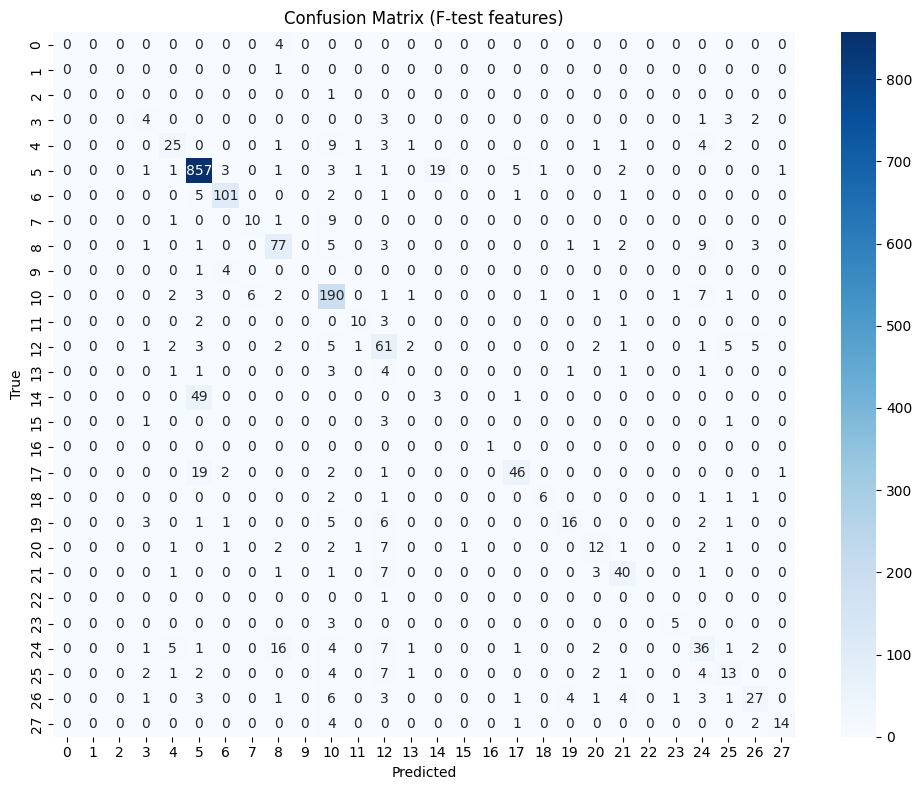

In [39]:
# === 1. IQR 离群值裁剪 ===
def winsorize_iqr(df, lower=1.5, upper=1.5):
    df_capped = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df_capped[col] = df[col].clip(
            lower=Q1 - lower * IQR,
            upper=Q3 + upper * IQR
        )
    return df_capped

# === 2. 可选的加权 Log Loss ===
def weighted_log_loss(y_true, y_pred_proba):
    # y_true: one‑hot matrix, y_pred_proba: probability matrix
    class_counts  = np.sum(y_true, axis=0)
    class_weights = 1.0 / (class_counts + 1e-8)
    class_weights /= np.sum(class_weights)
    sample_w      = np.sum(y_true * class_weights, axis=1)
    sample_losses = -np.sum(y_true * np.log(y_pred_proba + 1e-8), axis=1)
    return np.mean(sample_w * sample_losses)

# === 3. 读取你的 F-test 特征子集 & 对应标签 ===
# X_train_ftest, X_val_ftest, y_train_sub, y_val 需已定义在环境中

# === 4. 对 F-test 特征做 IQR 裁剪 ===
X_tr_iqr = winsorize_iqr(X_train_ftest)
X_val_iqr = winsorize_iqr(X_val_ftest)

# === 5. RobustScaler ===
scaler      = RobustScaler().fit(X_tr_iqr)
X_tr_scaled = scaler.transform(X_tr_iqr)
X_val_scaled= scaler.transform(X_val_iqr)

# === 6. SMOTE 过采样 ===
smote = SMOTE(random_state=42, k_neighbors=3)
X_tr_res, y_tr_res = smote.fit_resample(X_tr_scaled, y_train_sub)

# === 7. 定义你的最终模型 ===
final_model = XGBClassifier(
    objective='multi:softprob',
    num_class=28,
    eval_metric='mlogloss',
    tree_method='hist',
    device='cuda',
    random_state=42,
    n_estimators=700,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=1,
    colsample_bytree=0.6,
    subsample=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1
)

# === 8. 训练 ===
final_model.fit(X_tr_res, y_tr_res)

# === 9. 在验证集上评估 ===
y_pred   = final_model.predict(X_val_scaled)
y_proba  = final_model.predict_proba(X_val_scaled)

print("\n=== Validation Set Evaluation (F-test features) ===")
print(classification_report(y_val, y_pred, zero_division=0))
print(f"Accuracy:    {accuracy_score(y_val, y_pred):.4f}")
print(f"F1 Macro:    {f1_score(y_val, y_pred, average='macro'):.4f}")
print(f"F1 Weighted: {f1_score(y_val, y_pred, average='weighted'):.4f}")
print(f"Log Loss:    {log_loss(y_val, y_proba):.4f}")

# one‑hot 编码 y_val
lb = LabelBinarizer().fit(range(final_model.n_classes_))
y_val_onehot = lb.transform(y_val)
if y_val_onehot.shape[1] == 1:
    y_val_onehot = np.hstack([1 - y_val_onehot, y_val_onehot])

print(f"Weighted Log Loss: {weighted_log_loss(y_val_onehot, y_proba):.4f}")

# 混淆矩阵
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (F-test features)')
plt.tight_layout()
plt.show()

final_model.save_model('final_model_1.json')

In [ ]:
# ******************************   Model training finished   ******************************